* [how-to-use-tensorboard-with-pytorch](https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-tensorboard-with-pytorch.md)
* [Pytorch TensorBoard Tutorial](https://www.youtube.com/watch?v=RLqsxWaQdHE)
* [Using Tensorboard in Pytorch](https://krishansubudhi.github.io/deeplearning/2020/03/24/tensorboard-pytorch.html)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.tensorboard import (
    SummaryWriter,
)

In [2]:
%load_ext tensorboard

In [3]:
%load_ext autoreload
%autoreload 2

from main import (
    tensorboard_write_histogram,
    tensorboard_write_graph,
    tensorboard_write_image,
    tensorboard_write_scalar,
)

# Data

In [4]:
dataset = FashionMNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=1)

In [5]:
id_to_label = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [6]:
X, Y = next(iter(loader))
x = X[0]

channels: int = x.shape[0]
width: int = x.shape[1]
height: int = x.shape[2]

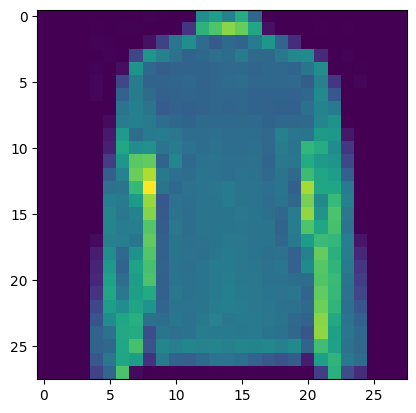

In [7]:
plt.imshow(x.squeeze())

# Model

In [12]:
class ConvNet(nn.Module):
  '''
    Simple Convolutional Neural Network
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Conv2d(channels, 32, kernel_size=3, padding="same"),
      nn.ReLU(),
      nn.Conv2d(32, 64, kernel_size=3, padding="same"),
      nn.BatchNorm2d(64),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(width * height * 64, 128),     
      nn.BatchNorm1d(128),
      nn.ReLU(),
      nn.Linear(128, 128),     
      nn.ReLU(),
      nn.Linear(128, 64),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [13]:
model: nn.Module = ConvNet()

# Tensorboard 

In [14]:
%rm -rf ./logs
writer = SummaryWriter("./logs")

## Model Grapph

In [15]:
tensorboard_write_graph(writer=writer, model=model, x=X)

# Training Loop

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [19]:
# Define the loss function and optimizer
for epoch in range(0, 3):   # 5 epochs at maximum
    tensorboard_write_histogram(writer=writer, model=model, step=epoch)

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(loader, 0):
        if i > 1000:
            #break
            pass

        # Get inputs
        inputs, targets = data

        # Write an image at every batch 0
        if i == 0:
            tensorboard_write_image(writer=writer, tag="image", image=inputs[0], step=epoch, dataformats="CHW")

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = model(inputs)

        # Compute loss
        loss = loss_fn(outputs, targets)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        current_loss += loss.item()

        if i % 201 == 200:
            print('Loss at batch %5d: %.3f' % (i, current_loss / i))

    # Write loss for epoch
    #print('Loss at epoch %5d: %.3f' % (epoch, current_loss / 1000))
    #tensorboard_write_scalar(writer=writer, tag="Loss/Epochs", value=current_loss / 1000, step=epoch)

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss at batch   200: 0.262
Loss at batch   401: 0.236
Loss at batch   602: 0.248
Loss at batch   803: 0.246
Loss at batch  1004: 0.241
Loss at batch  1205: 0.241
Loss at batch  1406: 0.239
Loss at batch  1607: 0.235
Loss at batch  1808: 0.235
Loss at batch  2009: 0.234
Loss at batch  2210: 0.232
Loss at batch  2411: 0.230
Loss at batch  2612: 0.230
Loss at batch  2813: 0.228
Loss at batch  3014: 0.226
Loss at batch  3215: 0.225
Loss at batch  3416: 0.223
Loss at batch  3617: 0.223
Loss at batch  3818: 0.223
Loss at batch  4019: 0.222
Loss at batch  4220: 0.220
Loss at batch  4421: 0.220
Loss at batch  4622: 0.220
Loss at batch  4823: 0.220
Loss at batch  5024: 0.219
Loss at batch  5225: 0.218
Loss at batch  5426: 0.218
Loss at batch  5627: 0.217
Loss at batch  5828: 0.217
Loss at batch  6029: 0.216
Loss at batch  6230: 0.216
Loss at batch  6431: 0.215
Loss at batch  6632: 0.216
Loss at batch  6833: 0.215
Loss at batch  7034: 0.215
Loss at batch  7235: 0.214
Loss at bat

KeyboardInterrupt: 

# Tensorboard

In [ ]:
%tensorboard --logdir ./logs/